<a href="https://colab.research.google.com/github/arnav-007/Data-Science-Project-Series./blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
! pip install -q kaggle


Load file to view the dataset
(EDA)


In [50]:
df_stock = pd.read_csv('/content/stockmarket.csv')
df_stock.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [51]:
df_stock.shape


(267, 1285)

In [52]:
df_stock.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Columns: 1285 entries, date to TARGET
dtypes: float64(1281), int64(2), object(2)
memory usage: 2.6+ MB


In [53]:
df_stock.describe()


,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,267.000000,267.000000,267.000000,267.000000,267.000000,2.670000e+02,237.000000,237.000000,226.000000,226.000000,...,238.000000,238.000000,235.000000,238.000000,235.000000,235.000000,266.000000,261.000000,261.000000,266.000000
mean,15.796648,16.116951,15.468506,15.785749,15.785749,1.610876e+05,50.101361,50.038441,50.921963,50.154602,...,17.810387,52.578993,52.685789,52.578993,52.685789,0.372617,1.461155,-0.040670,0.022548,0.195489
std,3.408034,3.454040,3.368421,3.419076,3.419076,2.591158e+05,13.239282,5.989617,8.835046,4.455605,...,2.510435,30.333677,28.285706,30.333677,28.285706,11.579736,2.230095,0.960030,6.064140,0.397324
min,4.500000,4.610000,4.050000,4.450000,4.450000,1.950000e+04,7.260120,40.924816,35.631228,44.770056,...,6.150000,1.234518,5.976293,1.234518,5.976293,-36.009395,0.296808,-2.700001,-14.285715,0.000000
25%,14.490000,14.780000,14.205000,14.480000,14.480000,7.080000e+04,41.677241,47.041334,44.338290,48.263751,...,16.090750,24.713864,26.021173,24.713864,26.021173,-6.235636,0.682701,-0.670000,-4.138357,0.000000
50%,15.740000,16.030001,15.530000,15.720000,15.720000,1.099000e+05,50.013504,48.487428,49.294634,49.014110,...,16.910000,52.470798,54.113988,52.470798,54.113988,-0.154580,1.006471,-0.060000,-0.429188,0.000000
75%,17.895000,18.455000,17.675000,18.025001,18.025001,1.646500e+05,56.881209,50.702080,56.943019,50.530850,...,20.660000,82.832126,80.809857,82.832126,80.809857,8.487945,1.572045,0.600000,3.882486,0.000000
max,21.730000,21.760000,21.059999,21.520000,21.520000,3.018200e+06,85.704345,87.874402,76.901190,83.023385,...,21.760000,98.951208,95.701085,98.951208,95.701085,34.825371,26.041415,2.340000,16.571883,1.000000


In [54]:
df_stock.isnull().sum()


date                 0
open                 0
high                 0
low                  0
close                0
                    ..
stochastic-kd-15    32
volumenrelativo      1
diff                 6
INCREMENTO           6
TARGET               1
Length: 1285, dtype: int64

Choose characteristics that have a strong correlation.



In [55]:
data_new = df_stock[['date','open', 'high', 'low', 'close']]
data_new

,date,open,high,low,close
0,2022-01-03,17.799999,18.219000,17.500000,17.760000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000
2,2022-01-05,17.580000,17.799999,16.910000,16.950001
3,2022-01-06,16.650000,16.879999,16.139999,16.170000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000
...,...,...,...,...,...
262,2022-01-19,4.800000,5.000000,4.800000,4.850000
263,2022-01-20,4.800000,5.000000,4.500000,4.605000
264,2022-01-21,4.550000,4.650000,4.205000,4.540000
265,2022-01-24,4.500000,4.610000,4.050000,4.500000


In [56]:
data_new.isnull().sum()


date     0
open     0
high     0
low      0
close    0
dtype: int64

<ipython-input-57-0d25f72afce8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_new.corr()


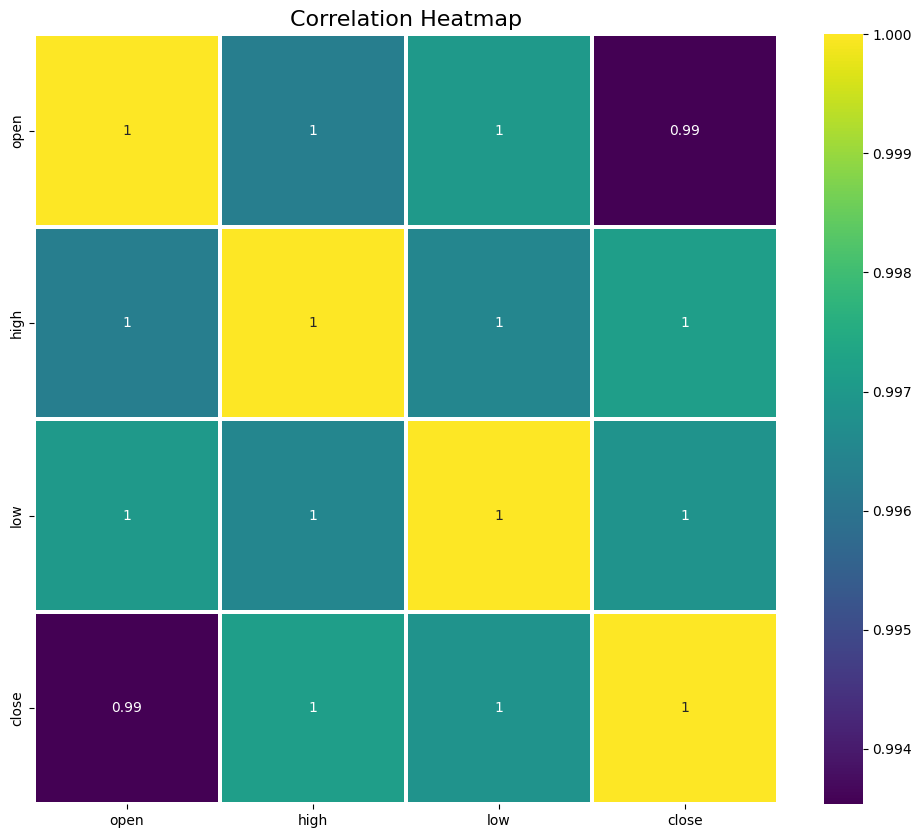

In [57]:
correlation_matrix = data_new.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=1.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

To display the start stock value for the following day, add a new column.

In [58]:
data_new["tomorrow"]= data_new["close"].shift(-1)
data_new

<ipython-input-58-5314dd1e6995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["tomorrow"]= data_new["close"].shift(-1)


,date,open,high,low,close,tomorrow
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000
...,...,...,...,...,...,...
262,2022-01-19,4.800000,5.000000,4.800000,4.850000,4.605000
263,2022-01-20,4.800000,5.000000,4.500000,4.605000,4.540000
264,2022-01-21,4.550000,4.650000,4.205000,4.540000,4.500000
265,2022-01-24,4.500000,4.610000,4.050000,4.500000,4.450000


Make a target to return a boolean based on the day-over-day change in the stock price.



In [59]:
data_new["target"] = data_new["tomorrow"] > data_new["close"].astype(float)
data_new

<ipython-input-59-5425aff5bc51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["target"] = data_new["tomorrow"] > data_new["close"].astype(float)


,date,open,high,low,close,tomorrow,target
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000,False
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001,False
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000,False
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000,False
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000,True
...,...,...,...,...,...,...,...
262,2022-01-19,4.800000,5.000000,4.800000,4.850000,4.605000,False
263,2022-01-20,4.800000,5.000000,4.500000,4.605000,4.540000,False
264,2022-01-21,4.550000,4.650000,4.205000,4.540000,4.500000,False
265,2022-01-24,4.500000,4.610000,4.050000,4.500000,4.450000,False


Load different machine learning models that can identify non-linear patterns and has a lower propensity to overfit.

In [60]:
from sklearn.ensemble import RandomForestClassifier


In [61]:
model = RandomForestClassifier(n_estimators=200, min_samples_split= 100, random_state=1)


All rows except the final 100 will be included in the train set. The test set will only include the last 100 rows.



In [62]:
train = data_new.iloc[:-100]
test = data_new.iloc[-100:]

In [63]:
predictors = ["open", "high", "low", "close"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

Verify accuracy using precision_score.



In [64]:
predictions = model.predict(test[predictors])

# Calculate accuracy
accuracy = accuracy_score(test["target"], predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4400


In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
train, test = train_test_split(data_new, test_size=100, random_state=1)


In [67]:
predictors = ["open", "high", "low", "close"]
model = XGBClassifier(n_estimators=200, min_child_weight=1, random_state=1)


In [68]:
model.fit(train[predictors], train["target"])


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [69]:
predictions = model.predict(test[predictors])


In [70]:
accuracy = accuracy_score(test["target"], predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5400


In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming data_new is your DataFrame and "target" is the binary target variable

# Create GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, min_samples_split=100, random_state=1)

# Split the data into training and testing sets
train = data_new.iloc[:-100]
test = data_new.iloc[-100:]

# Define predictors
predictors = ["open", "high", "low", "close"]

# Train the model
model.fit(train[predictors], train["target"])

# Make predictions on the test set
predictions = model.predict(test[predictors])

# Calculate accuracy
accuracy = accuracy_score(test["target"], predictions)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.4500


In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd


model = SVC(kernel='rbf', C=1, random_state=1)

train = data_new.iloc[:-100]
test = data_new.iloc[-100:]

predictors = ["open", "high", "low", "close"]

model.fit(train[predictors], train["target"])

predictions = model.predict(test[predictors])

accuracy = accuracy_score(test["target"], predictions)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.4500


So the best model is XGB classifier


In [71]:
pred = model.predict(test[predictors])
pred



array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1])

**DOCUMENTATION**

1) Data Exploration and Preprocessing:

* Installed necessary libraries for analysis.

* Checked for null values and outliers in the dataset.



2) Dataset Manipulation:


* Created a new dataset with selected columns.

* Introduced a new column, "tomorrow," by shifting
  values.










3) Target Variable Creation:


* Generated a new column, "target value," indicating
  day-to-day change in stock price as boolean values.






4) Data Splitting:

* Divided the dataset into training and testing sets,
  using the first 100 rows for training and the last 100 rows for testing.





5) Modeling:

* Employed various machine learning models, including
  Random Forest, XGB Classifier, and Gradient Boosting Classifier.




6) Model Evaluation:

* Assessed the accuracy of each model.
* Identified XGB Classifier as the best-performing
   model.